In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")


In [146]:
# Load the dataset
df = pd.read_csv("titanic/train.csv")
df.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Titanic Project: EDA Exploration Plan (Before Analysis)

Before starting formal EDA, we outline systematic exploration tasks for each feature, without assuming any conclusions.

For **every feature**, we will:
- Check missingness (null proportion).
- Examine distribution (categorical frequency or numerical histogram).
- Explore potential relationship with `Survived` where applicable.

---

| Column | Specific Focus |
|--------|----------------|
| PassengerId | Ignore for modeling; check for uniqueness and sequential order. |
| Survived | Target variable. |
| Pclass | Analyze distribution and survival rates across classes. |
| Name | Extract Title; examine Title variety and survival rates. |
| Sex | Explore gender distribution and survival differences. |
| Age | Analyze distribution and missing pattern; consider age grouping later. |
| SibSp & Parch | Explore individually and as combined FamilySize; check impact on survival. |
| Ticket | Analyze ticket structure (prefix, shared tickets); assess if usable. |
| Fare | Check distribution, skewness; potential transformation or binning. |
| Cabin | Extract CabinLetter; analyze missingness; explore deck-level survival patterns. |
| Embarked | Analyze port distribution; investigate survival differences across ports.

---

## PClass

In [147]:
# 1. Missing Rate
missing_rate = df['Pclass'].isnull().mean()
print(f"Missing Rate: {missing_rate:.2%}")

Missing Rate: 0.00%


In [148]:
# 2. Unique Values
unique_vals = df['Pclass'].nunique()
print(f"Unique Values: {unique_vals}")

Unique Values: 3


In [149]:
# 3. Describe
print(df['Pclass'].describe())

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


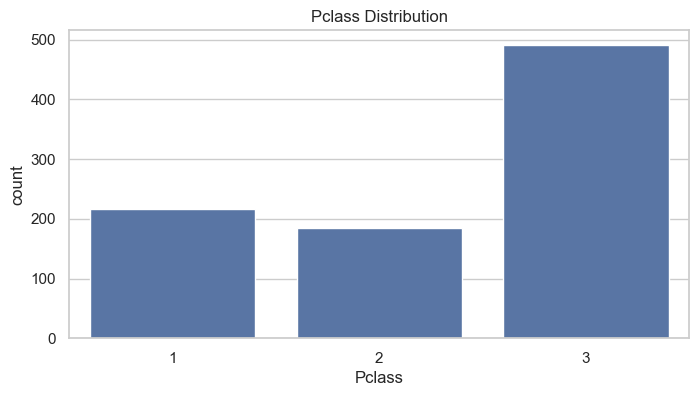

In [150]:
# 4. Distribution plot
plt.figure(figsize=(8,4))
sns.countplot(x='Pclass', data=df)
plt.title('Pclass Distribution')
plt.show()

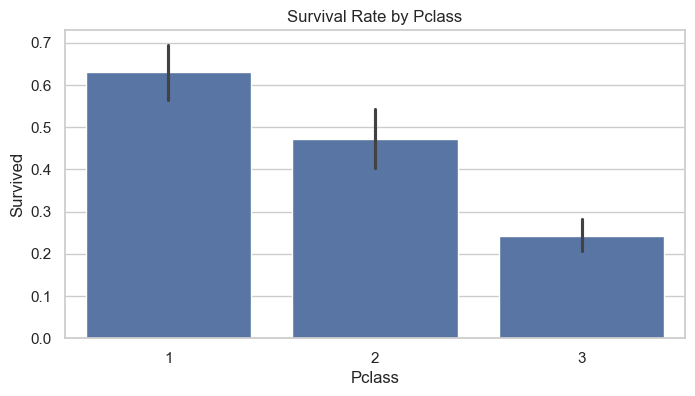

In [151]:
# 5. Relationship with Survived
plt.figure(figsize=(8,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

### Pclass - Univariate Analysis Summary

- No missing values detected.
- There are three unique classes: 1, 2, and 3.
- The distribution of passengers is imbalanced:  
  - Class 3 passengers are the majority, followed by Class 1, and then Class 2.
- Survival rates show a strong trend:
  - 1st class passengers have the highest survival rate,
  - followed by 2nd class,
  - and 3rd class passengers have the lowest survival rate.

This confirms that passenger class is a strong predictor of survival, reflecting socio-economic status impact on survival chances.


# Name

## Name - Feature Description and Exploration Plan

- **Description:**  
  The `Name` field contains full passenger names in the format:  
  **LastName, Title. FirstName (OtherInfo)**.  
  For example:  
  - "Braund, Mr. Owen Harris"
  - "Cumings, Mrs. John Bradley (Florence Briggs Thayer)"

- **Initial Observation:**  
  While the full name is unlikely to provide predictive power,  
  the embedded **Title** (e.g., Mr, Mrs, Miss, Master, etc.) reflects social status, gender, and potentially age — all factors that may impact survival chances.

- **Exploration Plan:**  
  - Extract `Title` from the Name field.
  - Analyze the frequency distribution of different Titles.
  - Explore the relationship between Titles and survival rates.
  - Consider grouping rare Titles into new categories for later feature engineering.


In [152]:
# Extract Title
df['Title'] = df['Name'].str.extract(', ([^\.]*)\.', expand=False)
print(df['Title'].unique())
print(df['Title'].value_counts())


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


### Title Meaning Interpretation

The extracted Titles from the Name field represent passengers' social status, gender, and sometimes age:

- **Mr**: Adult males.
- **Mrs**: Married women.
- **Miss**: Young or unmarried women.
- **Master**: Young boys (typically under 12).
- **Dr**: Doctor (male or female, professional class).
- **Rev**: Reverend (male clergy).
- **Military Titles** (Col, Major, Capt): Male military officers.
- **Nobility Titles** (Sir, Lady, Don, Countess, Jonkheer): Indicate noble or aristocratic status.
- **French Titles** (Mme, Mlle): Equivalent to Mrs and Miss respectively.
- **Ms**: General female title, less common in this dataset.

---

### Title Grouping Before Survival Analysis

Before exploring the relationship between Titles and survival rates, we grouped Titles based on their social and professional meanings rather than their frequency.

**Reasons for grouping Titles first:**

- **Sample Size Stability:**  
  Many rare Titles (such as "Capt", "Don", "Jonkheer") have extremely few occurrences. Their survival rates would not be statistically meaningful if analyzed individually.

- **Reducing Noise:**  
  Analyzing rare Titles separately would introduce noise and lead to misleading interpretations due to overfitting on small sample behavior.

- **Preserving Social Structure Information:**  
  Grouping Titles by social roles (such as Military, Royalty, Clergy) reflects realistic survival dynamics aboard the Titanic, which were influenced by social status and responsibilities.

- **Improved Modeling Robustness:**  
  Fewer, logically meaningful categories help the model generalize better without being overwhelmed by sparsely populated classes.

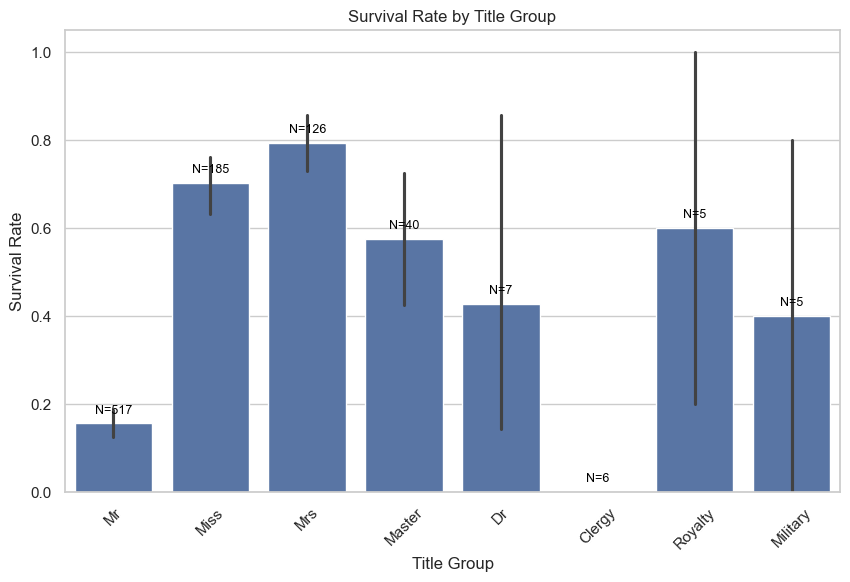

In [153]:
# Normalize French titles
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Define title grouping
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Dr': 'Dr',
    'Rev': 'Clergy',
    'Col': 'Military',
    'Major': 'Military',
    'Capt': 'Military',
    'Sir': 'Royalty',
    'Lady': 'Royalty',
    'Don': 'Royalty',
    'the Countess': 'Royalty',
    'Jonkheer': 'Royalty'
}

# Map into new TitleGroup
df['TitleGroup'] = df['Title'].map(title_mapping)

# Visualize survival rate by TitleGroup
title_counts = df['TitleGroup'].value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(x='TitleGroup', y='Survived', data=df, order=title_counts.index)
plt.title('Survival Rate by Title Group')
plt.ylabel('Survival Rate')
plt.xlabel('Title Group')
plt.xticks(rotation=45)

for p, count in zip(ax.patches, title_counts):
    ax.annotate(f'N={count}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', 
                fontsize=9, color='black', xytext=(0,5),
                textcoords='offset points')

plt.show()




In [154]:
missing_title = df['Title'].isnull().sum()
print(f"Missing Titles: {missing_title}")

missing_titlegroup = df['TitleGroup'].isnull().sum()
print(f"Missing TitleGroup: {missing_titlegroup}")


Missing Titles: 0
Missing TitleGroup: 0


### TitleGroup - Survival Rate Analysis Summary

Among the Title groups with relatively large sample sizes:
- **Mr** shows an extremely low survival rate.
- **Miss**, **Mrs**, and **Master** exhibit notably higher survival rates.

Among the Title groups with smaller sample sizes:
- **Royalty** appears to have a slightly higher survival rate compared to **Military** and **Dr**.
- **Military** and **Dr** show survival rates comparable to that of children (Master), and notably higher than Mr.
- However, given the very small sample sizes for these groups, no statistically reliable conclusions can be drawn.

A particularly notable observation:
- All six passengers in the **Clergy** group (Reverends) perished.
- This complete loss may reflect the social behaviors or priorities during the disaster (e.g., sacrificing seats for others).

---

### Sex - Feature Description and Exploration Plan

- **Description:**  
  The `Sex` field records the gender of each passenger (`male` or `female`).

- **Exploration Plan:**  
  - Check missingness.
  - Analyze gender distribution among passengers.
  - Explore the relationship between Sex and survival rate.

Given the historical context (women and children first evacuation policy), we expect gender to be a strong predictor of survival.


In [155]:
# Step 1: Check missing values
missing_rate = df['Sex'].isnull().mean()
print(f"Missing Rate for Sex: {missing_rate:.2%}")

Missing Rate for Sex: 0.00%


In [156]:
# Step 2: Check number of unique values
unique_vals = df['Sex'].nunique()
print(f"Unique Values in Sex: {unique_vals}")

Unique Values in Sex: 2


In [157]:
# Step 3: Check value counts (distribution)
print(df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


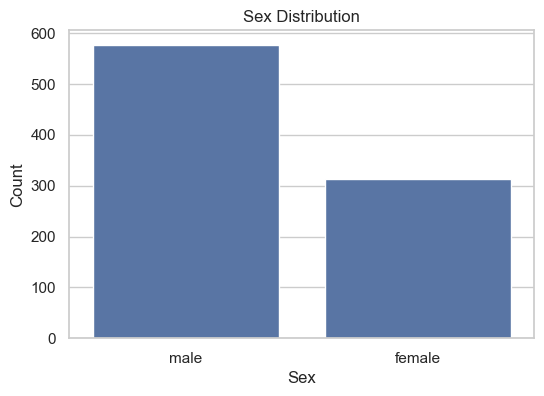

In [158]:
# Step 4: Visualize gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.show()

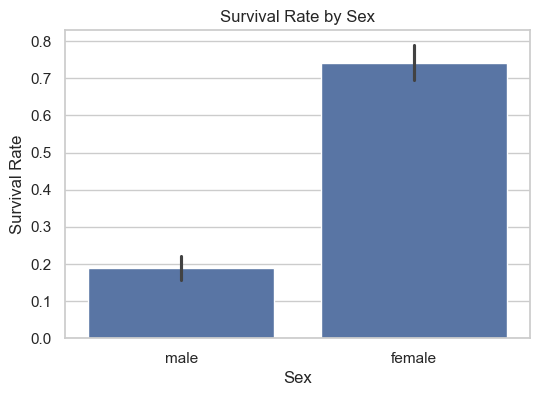

In [159]:
# Step 5: Visualize survival rate by gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show()

In [160]:
# Confusion Matrix for Sex and Survived
sex_survived_ct = pd.crosstab(df['Sex'], df['Survived'], rownames=['Sex'], colnames=['Survived'])

print(sex_survived_ct)


Survived    0    1
Sex               
female     81  233
male      468  109


### Sex - Univariate Analysis Summary

- No missing values in the `Sex` field.
- Two unique genders are present: `male` and `female`.
- Males are the majority among passengers.
- Survival analysis shows a strong gender effect:
  - Females have a significantly higher survival rate compared to males.

This supports historical expectations regarding evacuation priorities during the Titanic disaster.


### Age - Feature Description and Exploration Plan

- **Description:**  
  The `Age` field records the age of each passenger in years. It is a continuous numerical variable.

- **Exploration Plan:**  
  - Check missingness.
  - Analyze the distribution of Age.
  - Explore the relationship between Age and survival rate.
  - Consider different age bands (children, adults, elderly) for later feature engineering.

Age is expected to be a strong predictor of survival, especially given the "women and children first" evacuation protocol.


In [161]:
# Step 1: Check missingness
missing_rate = df['Age'].isnull().mean()
print(f"Missing Rate for Age: {missing_rate:.2%}")

# Step 2: Basic descriptive statistics
print(df['Age'].describe())


Missing Rate for Age: 19.87%
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


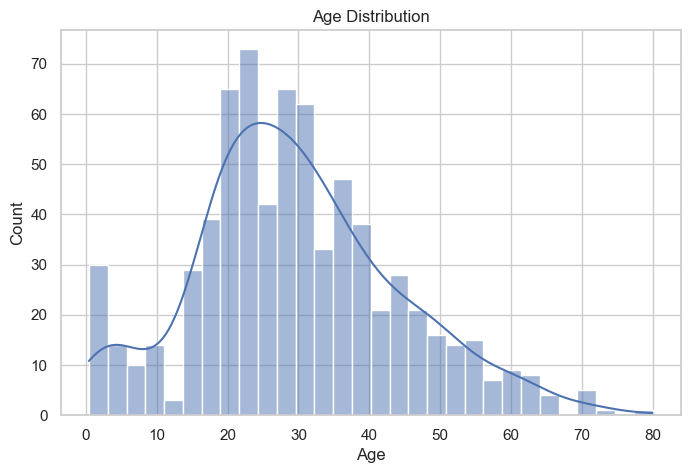

In [162]:
# Step 3: Visualize Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


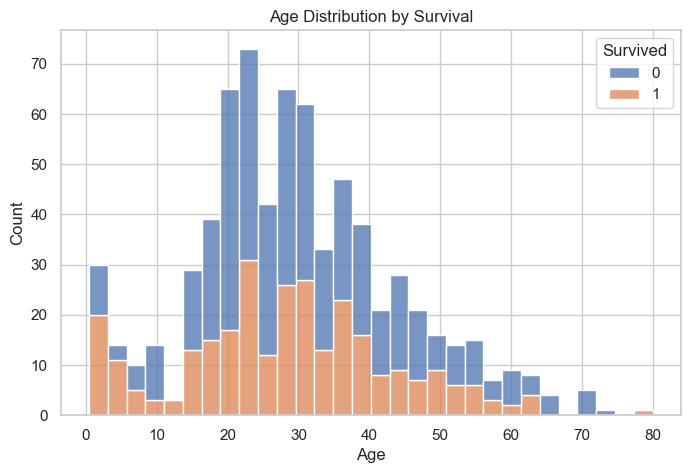

In [163]:
# Step 4: Visualize Survival Rate by Age (simple plot)
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Age - Univariate Analysis Summary

- Around 20% of Age values are missing.
- The Age distribution is approximately right-skewed, with most passengers aged between 20 and 40 years.
- Children (especially under 12) seem to have a higher survival rate compared to adults.
- Elderly passengers are relatively rare and show no clear survival advantage.
  
Handling missing Age values carefully will be crucial.

In [164]:
# Filter passengers with missing Age
missing_age_df = df[df['Age'].isnull()]

# Check Title distribution among missing Age passengers
print(missing_age_df['Title'].value_counts())


Title
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64


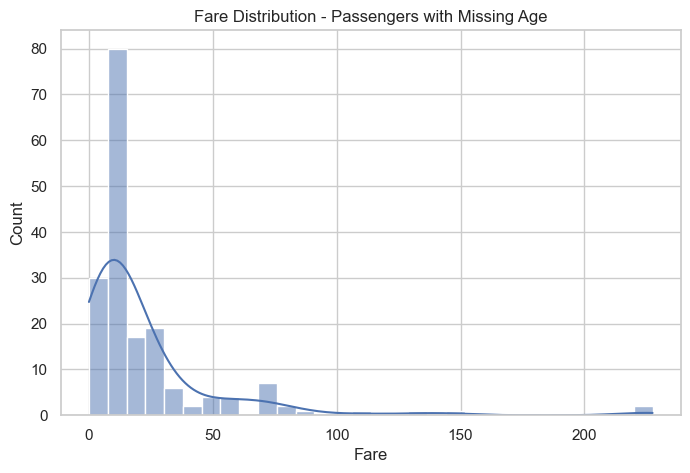

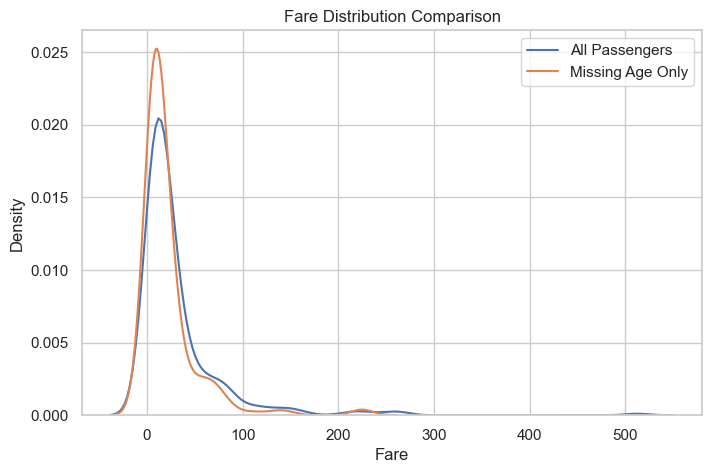

In [165]:
# Fare distribution among passengers with missing Age
plt.figure(figsize=(8,5))
sns.histplot(missing_age_df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution - Passengers with Missing Age')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Optionally: compare with full data
plt.figure(figsize=(8,5))
sns.kdeplot(df['Fare'], label='All Passengers')
sns.kdeplot(missing_age_df['Fare'], label='Missing Age Only')
plt.title('Fare Distribution Comparison')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()


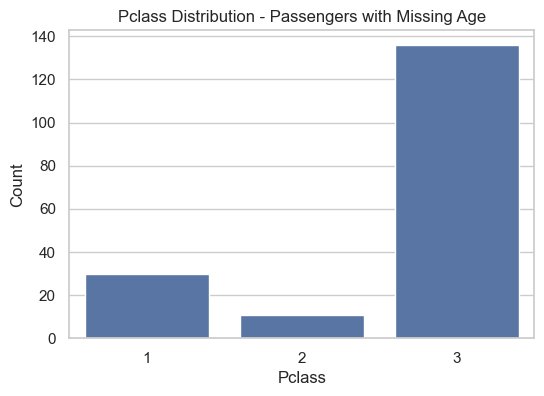

Pclass
3    136
1     30
2     11
Name: count, dtype: int64


In [166]:
# Pclass distribution among missing Age
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=missing_age_df, order=[1,2,3])
plt.title('Pclass Distribution - Passengers with Missing Age')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Print value counts
print(missing_age_df['Pclass'].value_counts())


### Missing Age - Consolidated Findings

- **Title Distribution:**
  - Among passengers with missing Age values, the majority hold common titles:
    - `Mr` (119 cases)
    - `Miss` (36 cases)
    - `Mrs` (17 cases)
    - `Master` (4 cases)
    - `Dr` (1 case)
  - No rare or noble titles are involved, eliminating the need to generalize into TitleGroups for Age imputation.

- **Pclass Distribution:**
  - 136 out of 177 passengers with missing Age belong to Pclass 3.
  - Missingness is heavily skewed towards lower socio-economic status passengers.

- **Fare Distribution:**
  - Fare analysis shows that passengers with missing Age values are predominantly concentrated in the lower Fare ranges.
  - A few high-Fare outliers (> $100) are present, indicating that missingness is not strictly confined to the poorest passengers.

- **KDE Plot Artifact:**
  - Negative Fare values appearing in the kernel density estimation plot are a visual artifact caused by the smoothing algorithm.
  - No actual Fare values in the dataset are negative.

**Conclusion:**
Despite a relatively high missingness rate (~20%), missing Age values are strongly patterned according to Title, Pclass, and Fare.  
This structure allows us to design an informed, targeted imputation strategy based on these features during Feature Engineering, without resorting to random or global imputation.


## Family-related Features (SibSp, Parch, FamilySize) - Exploration Plan

- **SibSp**: Number of siblings or spouses aboard.
- **Parch**: Number of parents or children aboard.
- **FamilySize**: Total family size aboard, calculated as `SibSp + Parch + 1` (including self).

**Exploration Plan:**
- Check for missing values in each field.
- Analyze individual distributions of SibSp, Parch, and FamilySize.
- Explore the relationship of each feature with survival rate.
- Evaluate whether combining SibSp and Parch into FamilySize provides a better predictive signal.


In [167]:
# Missing value check
print(f"Missing Rate for SibSp: {df['SibSp'].isnull().mean():.2%}")
print(f"Missing Rate for Parch: {df['Parch'].isnull().mean():.2%}")


Missing Rate for SibSp: 0.00%
Missing Rate for Parch: 0.00%


In [168]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


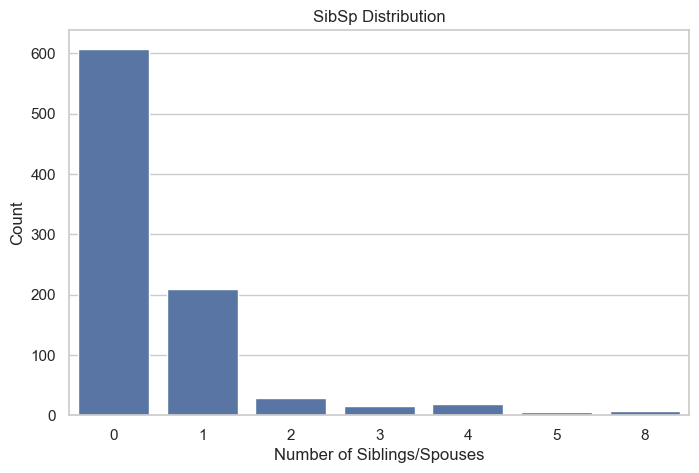

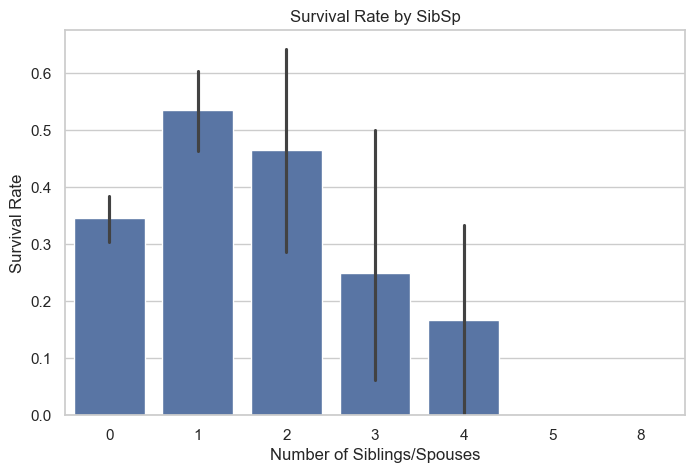

In [169]:
# SibSp Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='SibSp', data=df)
plt.title('SibSp Distribution')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

# SibSp vs Survival
plt.figure(figsize=(8,5))
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by SibSp')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.show()


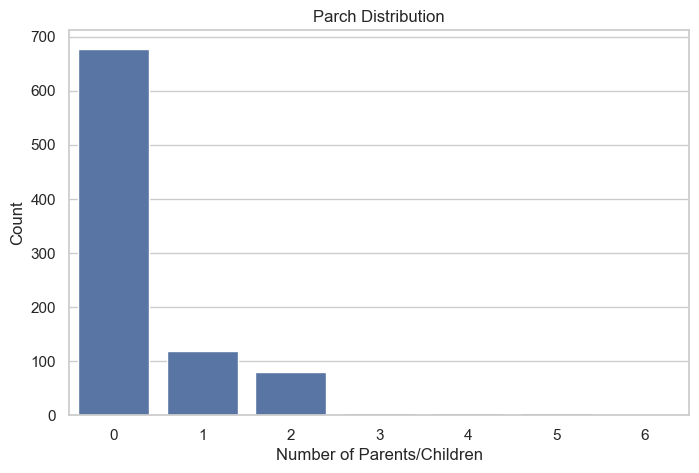

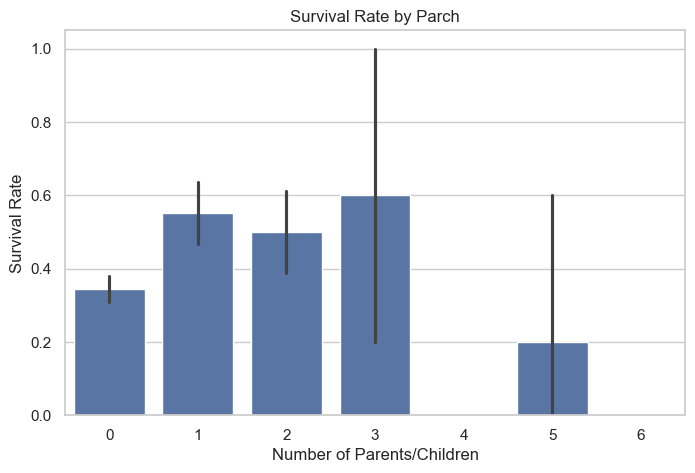

In [170]:
# Parch Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Parch', data=df)
plt.title('Parch Distribution')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.show()

# Parch vs Survival
plt.figure(figsize=(8,5))
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Parch')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.show()


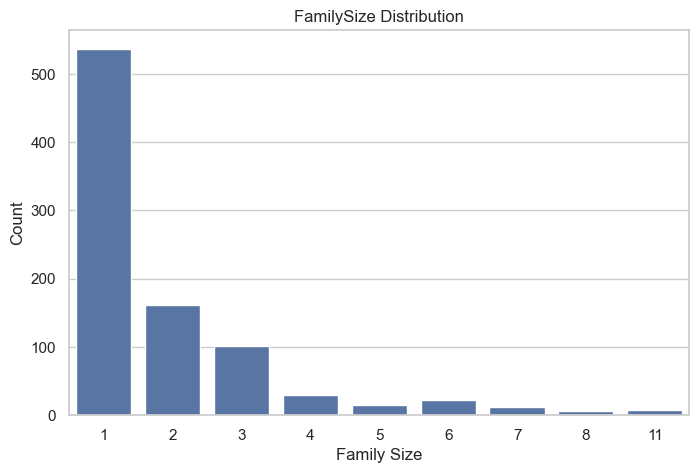

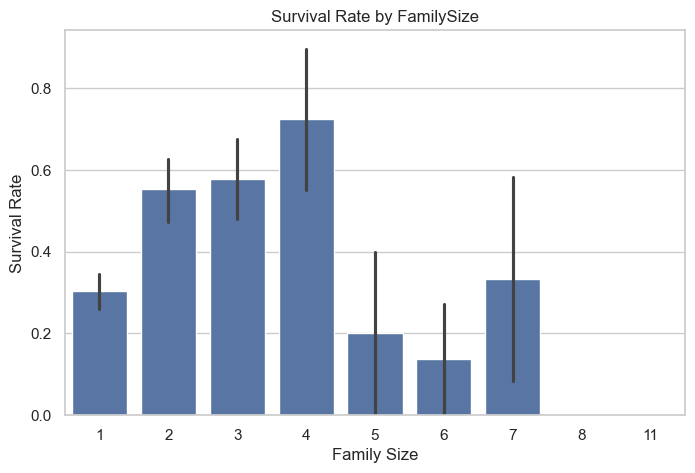

In [171]:
# FamilySize Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='FamilySize', data=df)
plt.title('FamilySize Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# FamilySize vs Survival
plt.figure(figsize=(8,5))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by FamilySize')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


### Family-related Features (SibSp, Parch, FamilySize) - Univariate Analysis Summary

- **SibSp:**  
  - Most passengers had no siblings or spouses aboard (SibSp = 0).
  - Having 1–2 siblings/spouses aboard was associated with a higher survival rate than traveling alone.
  - Larger numbers of siblings/spouses (>3) corresponded to a steep drop in survival rate.

- **Parch:**  
  - The majority of passengers had no parents or children aboard (Parch = 0).
  - Having 1–2 parents/children slightly improved survival chances compared to traveling alone.
  - As with SibSp, while survival rates appear lower for passengers with more than 2 accompanying family members, the sample sizes for larger families (FamilySize > 3) are very small, resulting in wide confidence intervals. Thus, these observations should be interpreted with caution.

- **FamilySize:**  
  - Single travelers (FamilySize = 1) had lower survival rates.
  - Small families (FamilySize = 2–4) had the highest survival rates.
  - Large families (FamilySize > 4) showed a sharp decrease in survival rates, suggesting possible logistical or priority disadvantages during evacuation.
  
**Hidden Pattern Hypothesis:**  
While traveling with close family slightly improved survival odds, very large family groups may have faced coordination challenges during evacuation, leading to a survival disadvantage.

### FamilySize and Pclass - Cross Analysis Plan

**Objective:**
To explore how family size interacts with passenger class (`Pclass`) and how this combination affects survival chances.

**Rationale:**
- Pclass reflects socio-economic status (1st class = wealthy, 3rd class = poorer).
- FamilySize reflects traveling group size, which may impact evacuation logistics.
- Hypothesis: 
  - Larger families are likely more concentrated in third-class passengers, which may help explain the significant drop in survival rates for family sizes of 5 or more.

  - Wealthier passengers (first-class) may travel alone or in smaller groups.
  - Survival rates may differ by FamilySize within different Pclasses.

**Exploration Plan:**
- Create a heatmap to visualize the distribution of FamilySize across different Pclasses.
- Plot survival rates by FamilySize, further broken down by Pclass, to identify patterns.

This cross-feature exploration may reveal hidden survival patterns not evident from single-variable analyses.


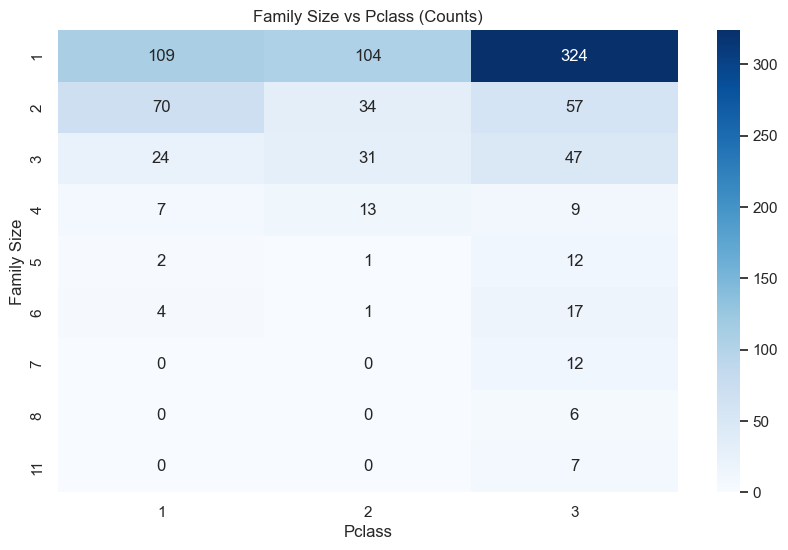

In [172]:
# Cross-tabulation of FamilySize and Pclass
family_pclass_ct = pd.crosstab(df['FamilySize'], df['Pclass'])

# Visualize as heatmap
plt.figure(figsize=(10,6))
sns.heatmap(family_pclass_ct, annot=True, fmt='d', cmap='Blues')
plt.title('Family Size vs Pclass (Counts)')
plt.xlabel('Pclass')
plt.ylabel('Family Size')
plt.show()


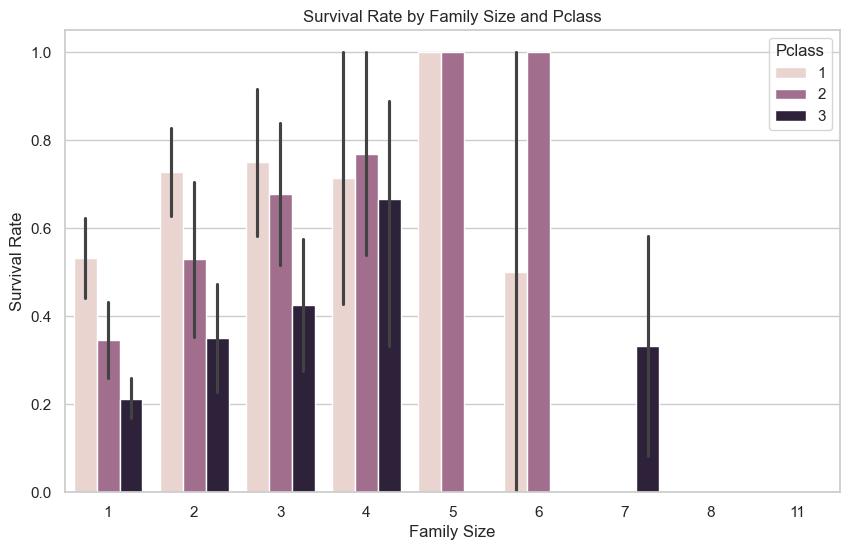

In [173]:
# Survival rate by FamilySize and Pclass
plt.figure(figsize=(10,6))
sns.barplot(x='FamilySize', y='Survived', hue='Pclass', data=df)
plt.title('Survival Rate by Family Size and Pclass')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.legend(title='Pclass')
plt.show()


### FamilySize and Pclass - Cross Analysis Summary

- Across all three passenger classes (Pclass 1, 2, 3), the majority of travelers had a FamilySize of 1 (traveling alone).
- When FamilySize is between 1 and 4:
  - Survival rates generally **increase** with FamilySize.
  - Passengers traveling with small families (2–4 members) had better survival chances than solo travelers.
  - This trend is consistent across Pclass 1, 2, and 3.
- When FamilySize exceeds 4:
  - Survival rates **drop sharply**.
  - This sharp decline is primarily driven by third-class passengers, who make up the vast majority of large families (FamilySize ≥ 5).
    - Pclass 1: Very few large families (two 5-person, four 6-person families).
    - Pclass 2: Only one 5-person and one 6-person family.
    - Pclass 3: Many large families (5, 6, 8, 11 members), almost all of whom perished.

**Conclusion:**
- Small family groups (2–4 members) enhanced survival chances across all classes.
- However, very large family groups (>4) — mainly concentrated in third class — experienced extremely poor survival outcomes.
- FamilySize affects survival in a **non-linear** way:  
  moderate family support appears protective, but excessive group size likely created logistical disadvantages during evacuation.

**Data Quality Note:**
In first-class passengers, discrepancies between reported family sizes and the actual number of passengers found (e.g., five-member families with only two listed members, six-member families with four) suggest possible under-reporting in the SibSp and Parch fields.  
Some family members may not have been properly recorded, introducing hidden missingness into family-related features.


## Ticket - Feature Description and Exploration Plan

**Description:**  
The `Ticket` field records each passenger’s ticket number, consisting of an optional alphanumeric prefix and a numeric sequence.

**Exploration and Feature Engineering Plan:**
- **Ticket Duplication Count:**  
  Calculate the number of passengers sharing the same ticket.  
  This captures additional group-travel information beyond SibSp and Parch, helping to refine FamilySize analysis.

- **Ticket Prefix Extraction:**  
  Extract the alphanumeric prefix (if present) as a categorical feature.  
  It may indirectly reflect socio-economic status, booking agency, or travel compartment.

- **Ticket Leading Digit:**  
  Extract the leading digit of the numeric part of the ticket.  
  The leading digit correlates with Pclass and may contain useful stratification information.

**Scope and Limitations:**  
- We intentionally avoid deep ticket number grouping or generating hundreds of derived features.
- The focus is on introducing lightweight, interpretable features that add value without unnecessary complexity.

**Objective:**  
To enrich the model with minimal yet meaningful information from the Ticket field, complementing existing family-related features and preserving model simplicity.


In [174]:
# 1. Missing check
print(f"Ticket Missing Rate: {df['Ticket'].isnull().mean():.2%}")

Ticket Missing Rate: 0.00%


In [175]:
# 2. Sample Tickets
print(df['Ticket'].head(20))

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object


In [176]:
# 3. Extract Prefix
def extract_ticket_prefix(ticket):
    ticket = ticket.replace('.', '').replace('/', '')
    parts = ticket.split()
    if parts[0].isalpha():
        return parts[0]
    elif len(parts) > 1 and parts[0].isalpha():
        return parts[0]
    else:
        return 'None'

df['TicketPrefix'] = df['Ticket'].apply(extract_ticket_prefix)
print(df['TicketPrefix'].value_counts())

TicketPrefix
None       698
PC          60
CA          41
SOTONOQ     15
STONO       12
WC          10
SCPARIS      7
SOC          6
FCC          5
C            5
LINE         4
SCParis      4
PP           3
WEP          3
SOPP         3
SCAH         3
PPP          2
SWPP         2
SP           1
SOP          1
Fa           1
SCOW         1
SC           1
AS           1
FC           1
CASOTON      1
Name: count, dtype: int64


In [177]:
# 4. Duplicate Tickets
ticket_dup_count = df['Ticket'].value_counts()
print(ticket_dup_count.describe())  # Basic stats
print(ticket_dup_count.value_counts())  # How many unique/duplicated tickets

count    681.000000
mean       1.308370
std        0.792652
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        7.000000
Name: count, dtype: float64
count
1    547
2     94
3     21
4     11
7      3
6      3
5      2
Name: count, dtype: int64


### Ticket Quick EDA Summary

- No missing values in the Ticket field.
- Ticket prefixes exist and appear meaningful, with a limited set of distinct prefixes.
- Most tickets are unique, but some are shared among 2-4 passengers, suggesting travel groups.
- Ticket field itself is messy and unstructured, but lightweight features (prefix, duplication count) may be useful.


## Fare - Feature Description and Exploration Plan

**Description:**  
The `Fare` field records the ticket fare paid by the passenger.  
It is a continuous numerical feature and reflects the economic status of the passenger.

**Exploration and Feature Engineering Plan:**  
- Check missing values.
- Explore the overall distribution (detect skewness, outliers).
- Investigate the relationship between fare levels and survival rates.
- Decide whether log transformation or binning may be beneficial for modeling.


In [178]:
# 1. Missing check
print(f"Fare Missing Rate: {df['Fare'].isnull().mean():.2%}")

Fare Missing Rate: 0.00%


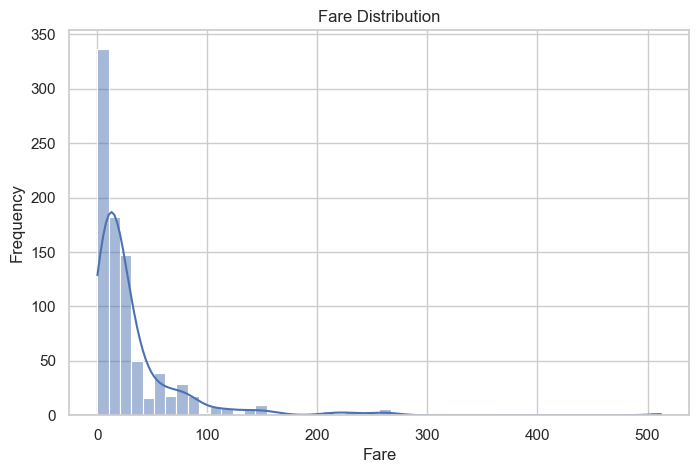

In [179]:
# 2. Distribution plot
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=50, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

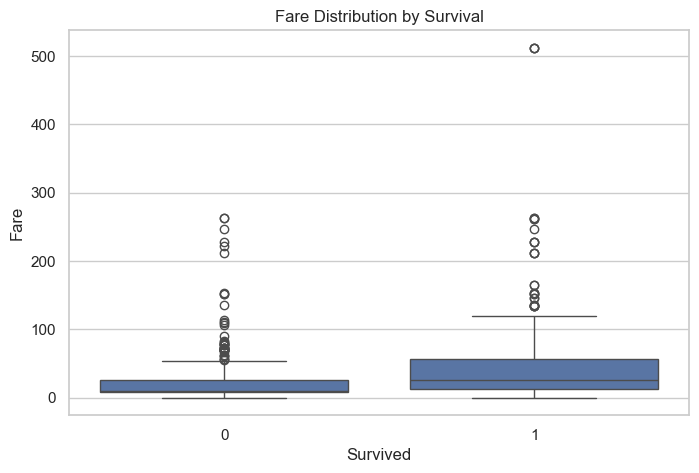

In [180]:
# 3. Boxplot by Survived
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.show()

In [181]:
# 4. Descriptive statistics
print(df['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [182]:
fare_zero_count = (df['Fare'] == 0).sum()
print(f"Number of passengers with Fare = 0: {fare_zero_count}")


Number of passengers with Fare = 0: 15


## Fare - EDA Summary

- There are no missing values in the Fare field for the training set.
- The Fare distribution is highly right-skewed, with a few extreme outliers (maximum fare over 500).
- Most passengers paid relatively low fares (25% below 7.91, 50% below 14.45).
- Survival rate increases with Fare: higher-paying passengers had a higher likelihood of survival.
- Some passengers have a Fare of 0, which could correspond to crew members or special cases.

### Discussion for Future Feature Engineering
- **Log Transformation:**  
  Due to the heavy right skew, a log transformation may help stabilize variance and improve model performance.
- **Fare Binning:**  
  Grouping fares into quantile-based bins (e.g., low, medium, high, very high) could simplify the model and reduce the effect of outliers.


## Cabin - Feature Description and Exploration Plan

**Description:**  
The `Cabin` field records the cabin number(s) assigned to the passenger.  
Most entries are missing, and the available values typically start with a single letter followed by numbers (e.g., `C85`, `B28`).  
The letter generally indicates the deck level.

**Exploration and Feature Engineering Plan:**
- Check the proportion of missing values.
- Analyze the available cabin prefixes (deck letters).
- Investigate the relationship between deck letters and survival rates.
- Discuss whether to create a "CabinKnown" indicator or group passengers based on deck information.

Due to the high missing rate, detailed cabin number information will likely not be used directly.  
Instead, the presence of a cabin assignment and/or the deck level may provide useful signals related to socio-economic status and survival chances.


In [183]:
# 1. Missing check
print(f"Cabin Missing Rate: {df['Cabin'].isnull().mean():.2%}")

# 2. Sample Cabin entries
print(df['Cabin'].dropna().head(20))

Cabin Missing Rate: 77.10%
1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
54            B30
55            C52
61            B28
62            C83
66            F33
75          F G73
88    C23 C25 C27
92            E31
96             A5
97        D10 D12
Name: Cabin, dtype: object


Deck
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64


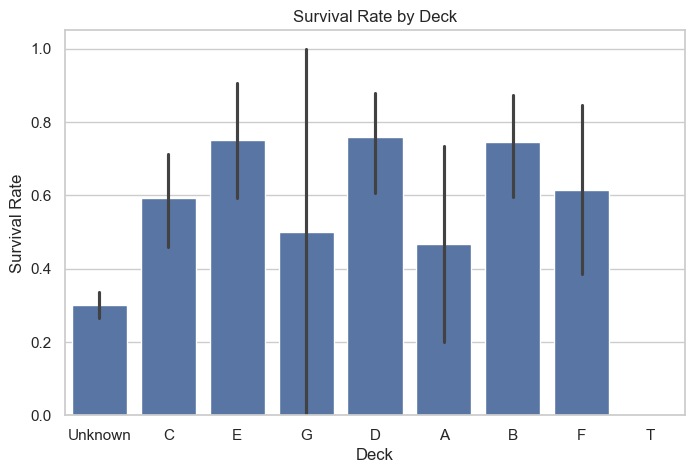

In [184]:
# 3. Extract first letter as Deck
# Extract the first deck letter only even for multiple cabins
df['Deck'] = df['Cabin'].apply(lambda x: str(x).split()[0][0] if pd.notnull(x) else 'Unknown')

# 4. Deck distribution
print(df['Deck'].value_counts())

# 5. Survival Rate by Deck
plt.figure(figsize=(8,5))
sns.barplot(x='Deck', y='Survived', data=df)
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.show()


## Exploring Relationships Between Cabin, Pclass, and Fare

**Rationale:**  
The `Cabin` feature encodes passengers' assigned deck levels, which likely reflect their location within the ship and socio-economic status.  
The `Pclass` (passenger class) and `Fare` (ticket price) features directly measure socio-economic status.

Thus, exploring the relationship between:
- **Cabin and Pclass**
- **Cabin and Fare**

can help us understand:
- Whether certain decks are reserved for specific classes.
- Whether fare levels correspond to deck assignments.
- Whether these structural divisions influenced survival outcomes during the disaster.

Identifying these hidden structures will guide feature engineering and help the model better capture important survival patterns.


Deck     A   B   C   D   E  F  G  T  Unknown
Pclass                                      
1       15  47  59  29  25  0  0  1       40
2        0   0   0   4   4  8  0  0      168
3        0   0   0   0   3  5  4  0      479


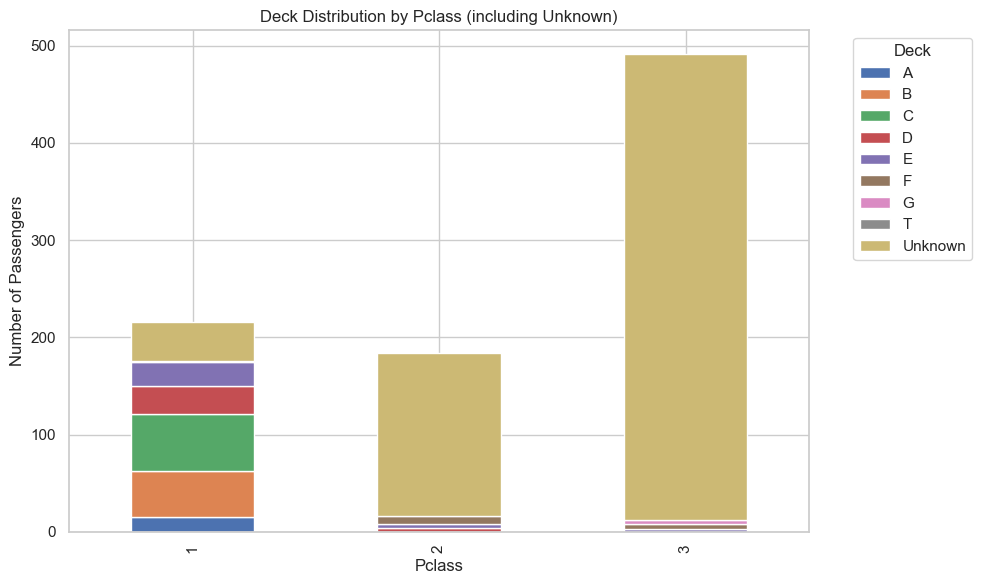

In [185]:
# Crosstab of Pclass and Deck including Unknown
pclass_deck_crosstab = pd.crosstab(df['Pclass'], df['Deck'])
print(pclass_deck_crosstab)

# Visualize the distribution
pclass_deck_crosstab.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Deck Distribution by Pclass (including Unknown)')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.legend(title='Deck', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

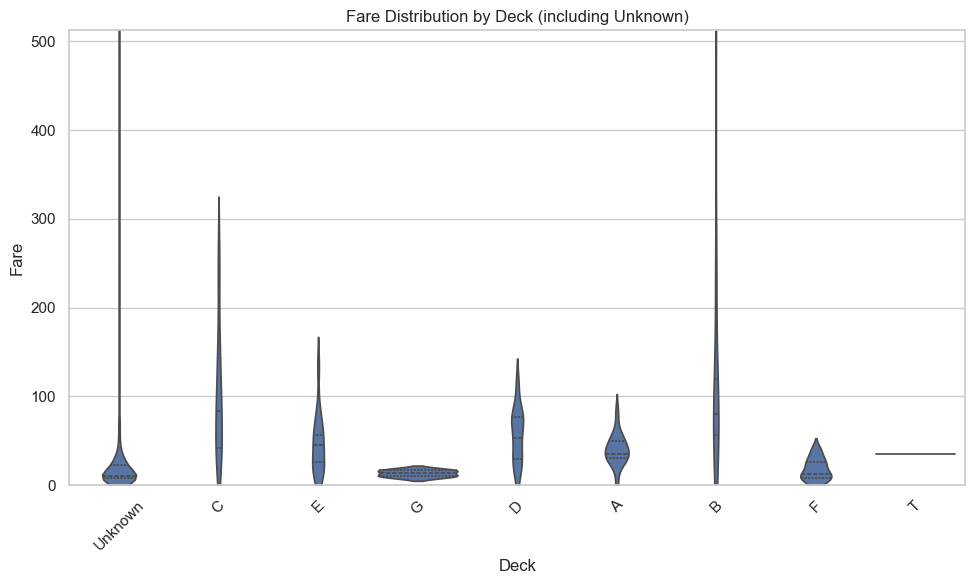

In [186]:
# Violin plot: Fare distribution across Decks
plt.figure(figsize=(10,6))
sns.violinplot(x='Deck', y='Fare', data=df, inner='quartile')
plt.title('Fare Distribution by Deck (including Unknown)')
plt.xlabel('Deck')
plt.ylabel('Fare')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, df['Fare'].max())

plt.show()


## Cabin (Deck) - EDA Summary

- About 77% of passengers have missing cabin information.  
  Missingness is not random: most passengers with missing Cabin are from third class (Pclass=3).

- Deck assignment is highly structured by socio-economic status:
  - Decks A, B, and C are mainly occupied by first-class passengers (Pclass=1).
  - Decks D and E include first- and second-class passengers.
  - Decks F and G are primarily used by second- and third-class passengers.
  - Deck "Unknown" (missing Cabin) passengers are mostly third-class travelers.

- Fare distribution analysis by Deck shows:
  - Higher decks (A, B, C) are associated with higher ticket prices.
  - Lower decks (F, G) and Unknown Deck passengers generally paid lower fares.

- Survival rate by Deck:
  - Certain decks (especially B, D, E) have higher survival rates.
  - Lower decks and Unknown Deck passengers have lower survival rates.

## Embarked - Feature Description and Exploration Plan

**Description:**  
The `Embarked` feature records the port where a passenger boarded the Titanic.  
Possible values:
- C = Cherbourg
- Q = Queenstown
- S = Southampton

**Exploration Goals:**
- Check missing values.
- Analyze the distribution of passengers across embarkation ports.
- Explore the relationship between Embarked and socio-economic indicators (Pclass, Fare).
- Examine survival rates by embarkation port.
- Evaluate whether Embarked should be used as a standalone feature or interact with other features.

Understanding embarkation ports may reveal hidden survival patterns related to ticket prices, passenger demographics, and ship layout.


In [187]:
# Check missing values in Embarked
print(df['Embarked'].isnull().sum())


2


Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


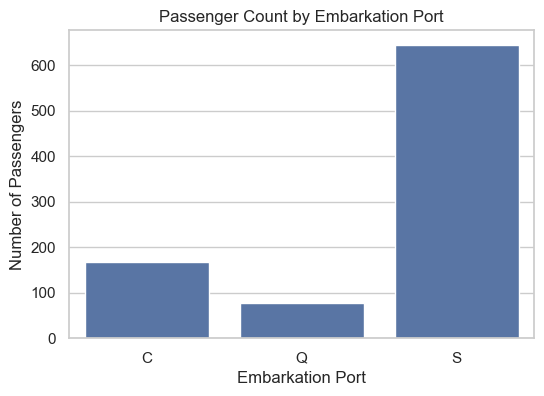

In [188]:
# Distribution of Embarked values
print(df['Embarked'].value_counts(dropna=False))

# Visualize
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', data=df, order=['C','Q','S'])
plt.title('Passenger Count by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.show()


Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


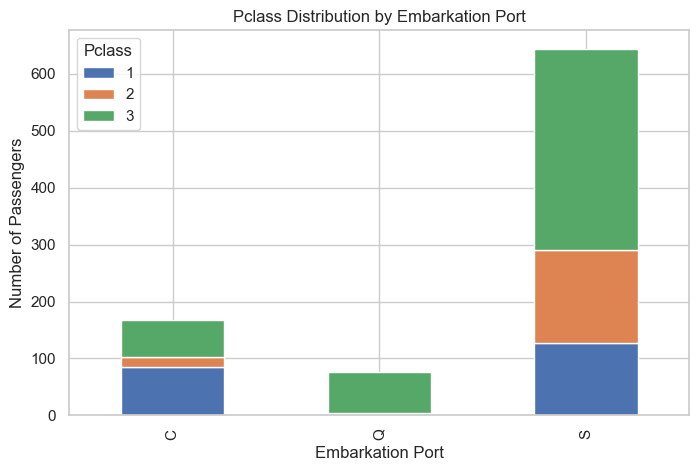

In [189]:
# Crosstab: Embarked vs Pclass
embarked_pclass_ct = pd.crosstab(df['Embarked'], df['Pclass'])
print(embarked_pclass_ct)

# Visualize
embarked_pclass_ct.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Pclass Distribution by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.legend(title='Pclass')
plt.show()


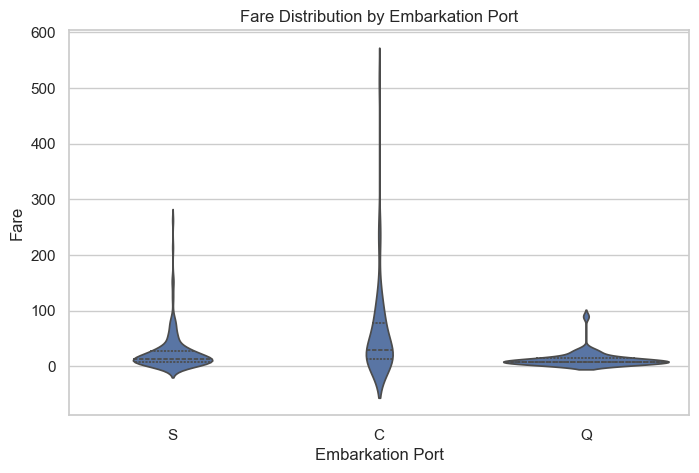

In [190]:
# Violin plot: Fare by Embarkation Port
plt.figure(figsize=(8,5))
sns.violinplot(x='Embarked', y='Fare', data=df, inner='quartile')
plt.title('Fare Distribution by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Fare')
plt.show()


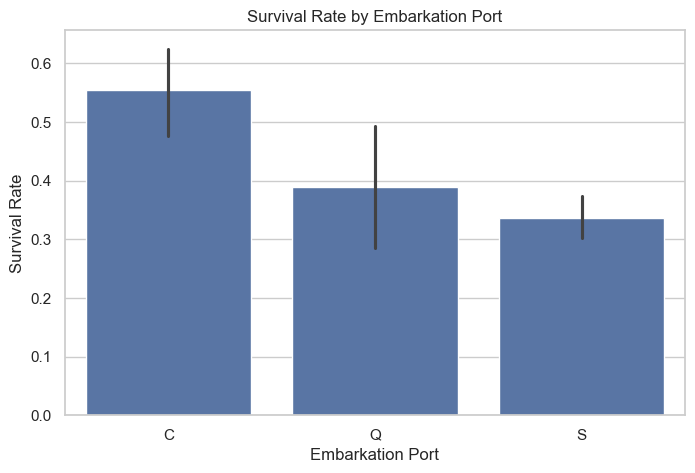

In [191]:
# Survival Rate by Embarked
plt.figure(figsize=(8,5))
sns.barplot(x='Embarked', y='Survived', data=df, order=['C','Q','S'])
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()


### Embarked - EDA Summary

- Most passengers embarked from Southampton (S), followed by Cherbourg (C), and Queenstown (Q).
- Cherbourg passengers tend to be wealthier (higher Fare), and more likely to be in first class.
- Survival rates are higher for passengers embarked at Cherbourg.
- Embarked correlates with socio-economic status and should be retained as a categorical feature.
